In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Initialize variables
set_count=1
record_count=1
city_data = []

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations. Zip pairs up lats and lngs in pairs in the same index in their respective array into a tuple.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | nelson bay
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ponta delgada
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bunia
Processing Record 9 of Set 1 | carroll
Processing Record 10 of Set 1 | almaty
Processing Record 11 of Set 1 | saleaula
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ulladulla
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | labuhan
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | dunedin
Processing Record 23 of Set 1 | lampazos de naranjo
Processing 

Processing Record 33 of Set 4 | parainen
Processing Record 34 of Set 4 | sattur
Processing Record 35 of Set 4 | santa eulalia del rio
City not found. Skipping...
Processing Record 36 of Set 4 | kulhudhuffushi
Processing Record 37 of Set 4 | sao joao nepomuceno
Processing Record 38 of Set 4 | ola
Processing Record 39 of Set 4 | san joaquin
Processing Record 40 of Set 4 | marovoay
Processing Record 41 of Set 4 | sterling
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | igrim
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | temerloh
Processing Record 46 of Set 4 | mrirt
City not found. Skipping...
Processing Record 47 of Set 4 | beloha
Processing Record 48 of Set 4 | el dorado
Processing Record 49 of Set 4 | ust-nera
Processing Record 50 of Set 4 | xiaoyi
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | sehithwa
Processing Record 3 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 4 of Set 5 | port hedl

Processing Record 22 of Set 8 | valparaiso
Processing Record 23 of Set 8 | tutoia
Processing Record 24 of Set 8 | chisinau
Processing Record 25 of Set 8 | doha
Processing Record 26 of Set 8 | orocue
Processing Record 27 of Set 8 | ilmajoki
Processing Record 28 of Set 8 | hihifo
City not found. Skipping...
Processing Record 29 of Set 8 | vitim
Processing Record 30 of Set 8 | abu kamal
Processing Record 31 of Set 8 | los llanos de aridane
Processing Record 32 of Set 8 | khonuu
City not found. Skipping...
Processing Record 33 of Set 8 | zlatoustovsk
City not found. Skipping...
Processing Record 34 of Set 8 | tavda
Processing Record 35 of Set 8 | saint-leu
Processing Record 36 of Set 8 | umea
Processing Record 37 of Set 8 | udachnyy
Processing Record 38 of Set 8 | jujuy
City not found. Skipping...
Processing Record 39 of Set 8 | gold coast
Processing Record 40 of Set 8 | kimbe
Processing Record 41 of Set 8 | wad madani
Processing Record 42 of Set 8 | sungaipenuh
Processing Record 43 of Set

Processing Record 10 of Set 12 | innisfail
Processing Record 11 of Set 12 | akhmeta
Processing Record 12 of Set 12 | hobyo
Processing Record 13 of Set 12 | hua hin
Processing Record 14 of Set 12 | waw
Processing Record 15 of Set 12 | ngunguru
Processing Record 16 of Set 12 | oranjemund
Processing Record 17 of Set 12 | kavaratti
Processing Record 18 of Set 12 | dzialdowo
Processing Record 19 of Set 12 | bucerias
Processing Record 20 of Set 12 | pascagoula
Processing Record 21 of Set 12 | nicoya
Processing Record 22 of Set 12 | guozhen
Processing Record 23 of Set 12 | belmonte
Processing Record 24 of Set 12 | vayalar
Processing Record 25 of Set 12 | srednekolymsk
Processing Record 26 of Set 12 | semey
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | douentza
Processing Record 29 of Set 12 | montrose
Processing Record 30 of Set 12 | anadyr
Processing Record 31 of Set 12 | waipawa
Processing Record 32 of Set 12 | abu jubayhah
City not found. Skipping...
P

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,44.83,87,100,5.75,CA,2022-07-22 09:06:28
1,Nelson Bay,-32.7167,152.1500,63.00,78,50,14.00,AU,2022-07-22 09:06:28
2,Kapaa,22.0752,-159.3190,77.32,82,40,13.80,US,2022-07-22 09:06:28
3,Mataura,-46.1927,168.8643,39.47,96,68,2.80,NZ,2022-07-22 09:06:28
4,Ponta Delgada,37.7333,-25.6667,70.52,78,20,2.30,PT,2022-07-22 09:02:22
5,Saint-Philippe,-21.3585,55.7679,78.39,63,9,11.34,RE,2022-07-22 09:06:29
6,Ushuaia,-54.8000,-68.3000,33.46,86,75,32.21,AR,2022-07-22 09:06:29
7,Bunia,1.5667,30.2500,80.87,33,28,12.28,CD,2022-07-22 09:06:29
8,Carroll,39.5501,-77.0164,76.03,74,0,4.61,US,2022-07-22 09:06:30
9,Almaty,43.2500,76.9500,100.31,10,0,6.71,KZ,2022-07-22 09:06:16


In [9]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df.reindex(columns=new_column_order)
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2022-07-22 09:06:28,70.4692,-68.5914,44.83,87,100,5.75
1,Nelson Bay,AU,2022-07-22 09:06:28,-32.7167,152.1500,63.00,78,50,14.00
2,Kapaa,US,2022-07-22 09:06:28,22.0752,-159.3190,77.32,82,40,13.80
3,Mataura,NZ,2022-07-22 09:06:28,-46.1927,168.8643,39.47,96,68,2.80
4,Ponta Delgada,PT,2022-07-22 09:02:22,37.7333,-25.6667,70.52,78,20,2.30
...,...,...,...,...,...,...,...,...,...
542,Naze,JP,2022-07-22 09:24:40,28.3667,129.4833,81.52,79,60,10.83
543,Kichmengskiy Gorodok,RU,2022-07-22 09:25:40,59.9816,45.7854,79.59,43,38,8.81
544,Panalingaan,PH,2022-07-22 09:25:40,8.7842,117.4231,81.97,82,100,3.11
545,Carpinteria,US,2022-07-22 09:25:41,34.3989,-119.5185,62.69,49,10,2.59


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Get today's date in seconds.
today = time.time()
today

1658481940.8496811

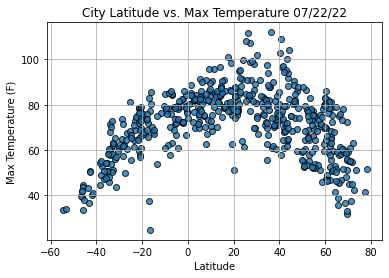

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

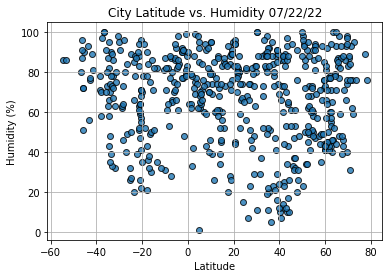

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

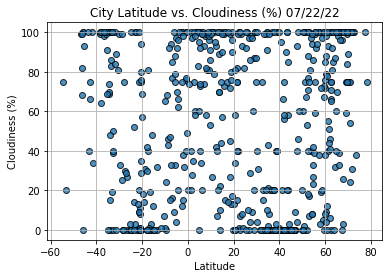

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

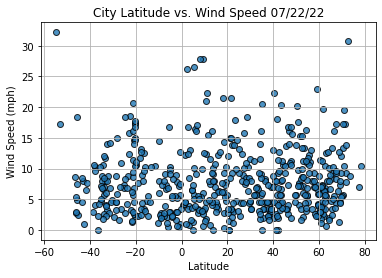

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Look at row 13
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2022-07-22 09:06:25
Lat                       42.6001
Lng                      -73.9662
Max Temp                    68.52
Humidity                       89
Cloudiness                      0
Wind Speed                   4.03
Name: 13, dtype: object

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

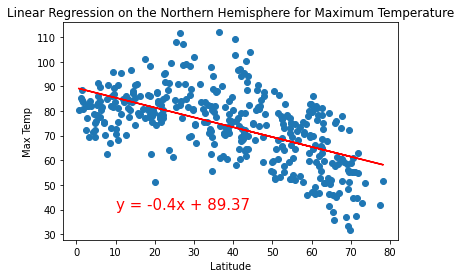

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

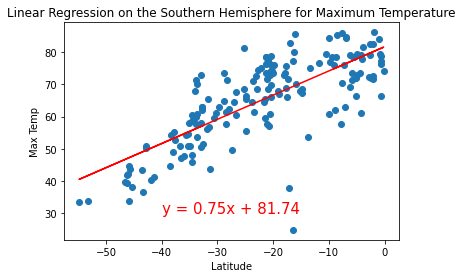

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-40,30))

In [94]:
(north_temp_slope, north_temp_intercept, north_temp_r_value, north_temp_p_value, north_temp_std_err) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Check r-value
north_temp_r_value

-0.5778396992809155

In [95]:
(south_temp_slope, south_temp_intercept, south_temp_r_value, south_temp_p_value, south_temp_std_err) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Check r-value
south_temp_r_value

0.7590742272967773

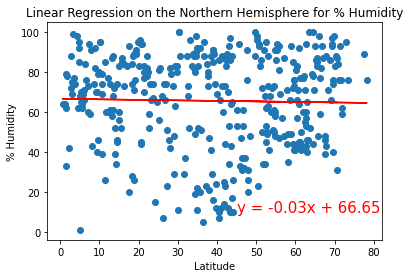

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

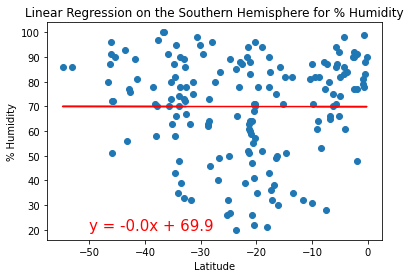

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,20))

In [98]:
(north_hum_slope, north_hum_intercept, north_hum_r_value, north_hum_p_value, north_hum_std_err) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Check r-value
north_hum_r_value

-0.023071229392025768

In [99]:
(south_hum_slope, south_hum_intercept, south_hum_r_value, south_hum_p_value, south_hum_std_err) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Check r-value
south_hum_r_value

-0.0008576393238977444

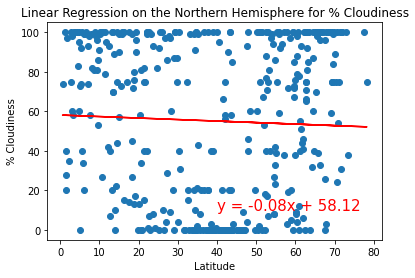

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

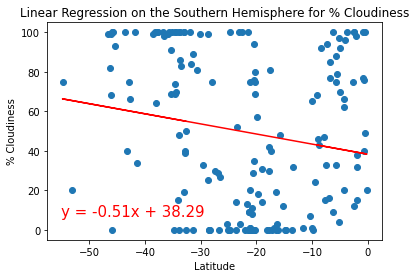

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,7))

In [106]:
(north_cloud_slope, north_cloud_intercept, north_cloud_r_value, north_cloud_p_value, north_cloud_std_err) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Check r-value
north_cloud_r_value

-0.04017111192143449

In [103]:
(south_cloud_slope, south_cloud_intercept, south_cloud_r_value, south_cloud_p_value, south_cloud_std_err) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Check r-value
south_cloud_r_value

-0.1753086560355731

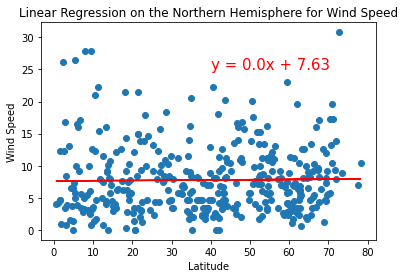

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

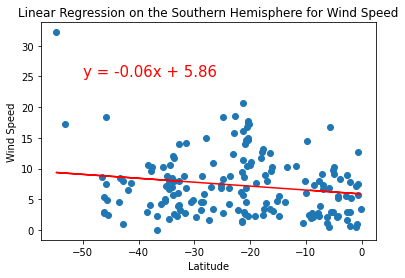

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))

In [107]:
(north_wind_slope, north_wind_intercept, north_wind_r_value, north_wind_p_value, north_wind_std_err) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Check r-value
north_wind_r_value

0.015113261732293702

In [108]:
(south_wind_slope, south_wind_intercept, south_wind_r_value, south_wind_p_value, south_wind_std_err) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Check r-value
south_wind_r_value

-0.1695313001208984